# Case Study: Model Engineering - DLMDSME01- Task 1

In [67]:
# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data_quality"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Introduction

Preparing and cleaning data is a crucial aspect of building a machine-learning model. 

# First Steps with a new dataset

## Load the data

In [21]:
df = pd.read_excel('PSP_Jan_Feb_2019_coded.xlsx', 
                 usecols = [1, 2, 3, 4, 5, 6, 7, 8, 9,10])
                 #low_memory=False)
    
df2 = pd.read_excel('PSP_Jan_Feb_2019.xlsx', 
                 usecols = [1, 2, 3, 4, 5, 6, 7])
                 #low_memory=False)
        

In [60]:
xda = pd.read_excel('PSP_Jan_Feb_2019.xlsx', 
                 usecols = [1, 2, 3, 4, 5, 6, 7])

Explanation:
   *    **low_memory**: lower memory use while parsing
   *    **usecols**: use subset of the columns

Familiarize with the data with certain pandas commands, like the head(), the shape(), the info() commands.

# Visualisation of the Data

We do our data plot visuals

array([[<AxesSubplot:title={'center':'tmsp'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'success'}>,
        <AxesSubplot:title={'center':'3D_secured'}>]], dtype=object)

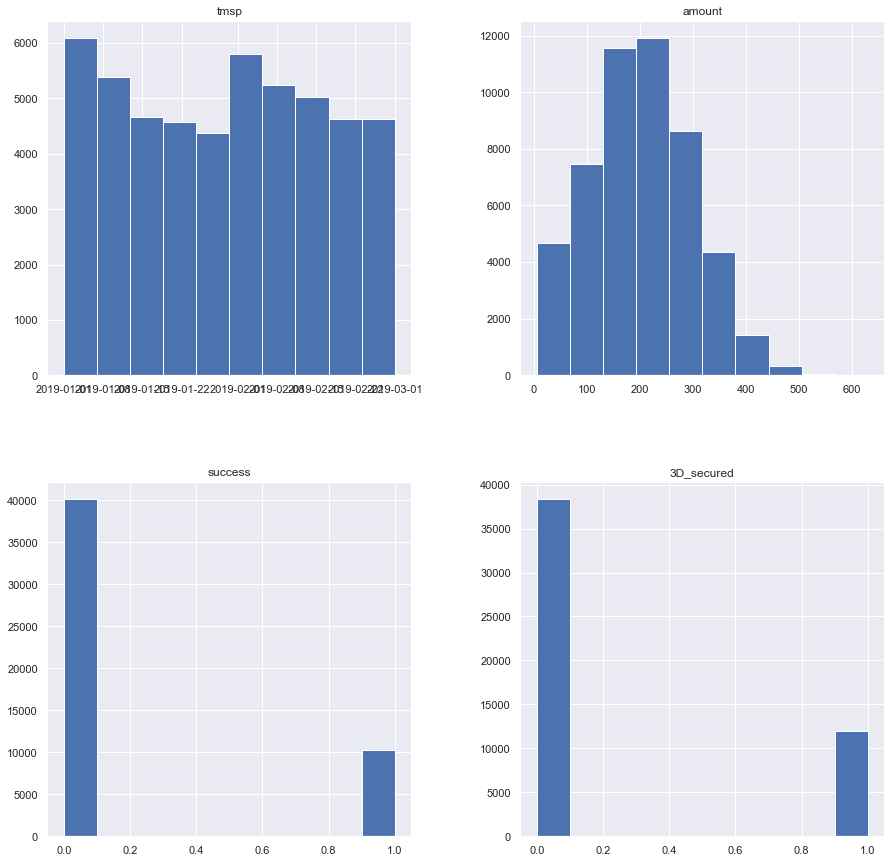

In [61]:
xda.hist(figsize=(15,15))

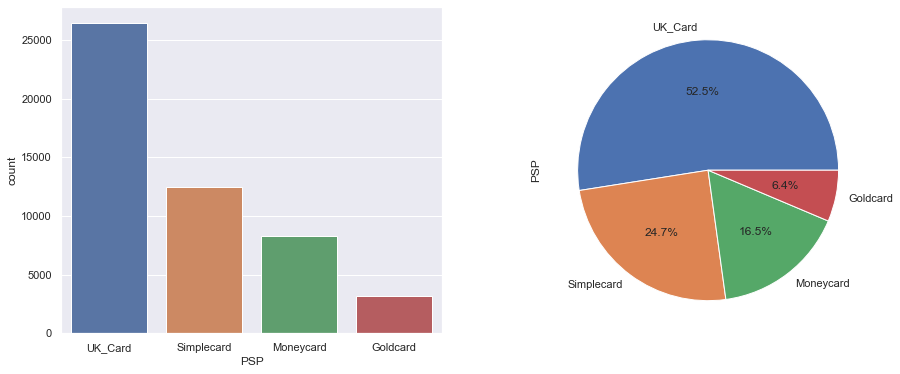

In [62]:
#visualisation
#PSP
plt.show()
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='PSP', data=df, ax=ax[0])
_ = xda['PSP'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

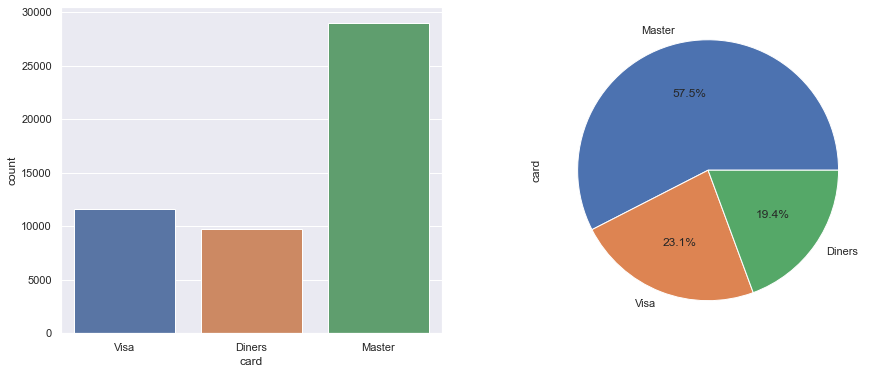

In [64]:
#visualisation
#card
plt.show()
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='card', data=df, ax=ax[0])
_ = xda['card'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

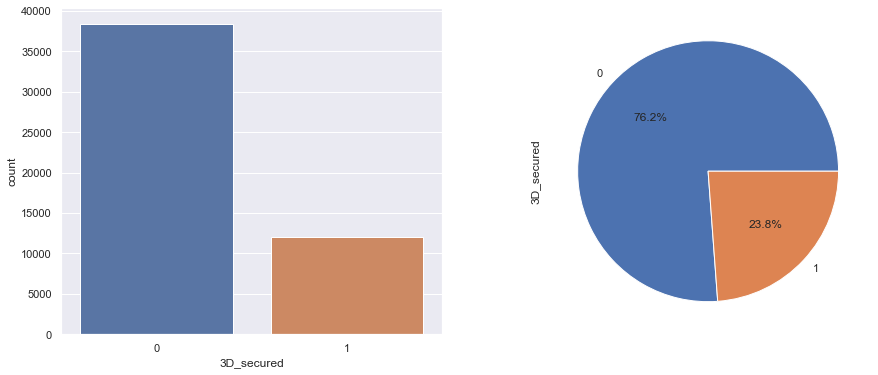

In [65]:
#visualisation
#3D-secured
plt.show()
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='3D_secured', data=df, ax=ax[0])
_ = xda['3D_secured'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

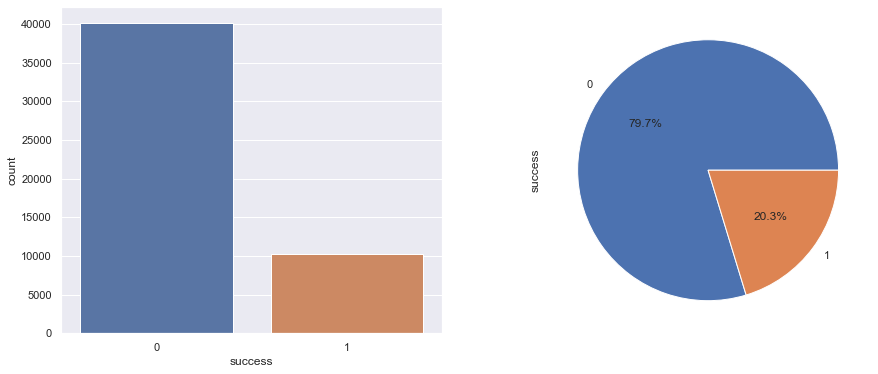

In [66]:
#visualisation
#PSP
plt.show()
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='success', data=df, ax=ax[0])
_ = xda['success'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

# Data Quality Check

We check the quality of our data for data analysis

In [4]:
# We peep into the type of data contained in our dataframe
df2.head(3)

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners


In [5]:
# We investigate for any missing Values in our dataset
df2.isnull().sum(axis= 0)

tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [6]:
#We describe the fields in our dataset
df2.describe()

,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000
mean,202.395715,0.202896,0.238266
std,96.274730,0.402160,0.426027
min,6.000000,0.000000,0.000000
25%,133.000000,0.000000,0.000000
50%,201.000000,0.000000,0.000000
75%,269.000000,0.000000,0.000000
max,630.000000,1.000000,1.000000


The dat a has meaningful metrics according to our real world understanding of the metrics

In [7]:
#We first eliminate the text fields to analyse if they're any outliers in the numerical data
outlier = df[['success','amount','3D_secured']]
outlier.head(3)

,success,amount,3D_secured
0,0,89,0
1,1,89,0
2,0,238,1


In [8]:
#We define the a function that will make plots of all the fields at once
def draw_univariate_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(30,35))

    counter=0
    
    for i in range(rows):
        for j in range(cols):

            if column_names[counter]=='target':
                break
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                #sns.boxplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
                sns.boxplot(x=None, y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter += 1
            if counter==(number_of_column-1,):
                break

IndexError: index 3 is out of bounds for axis 0 with size 3

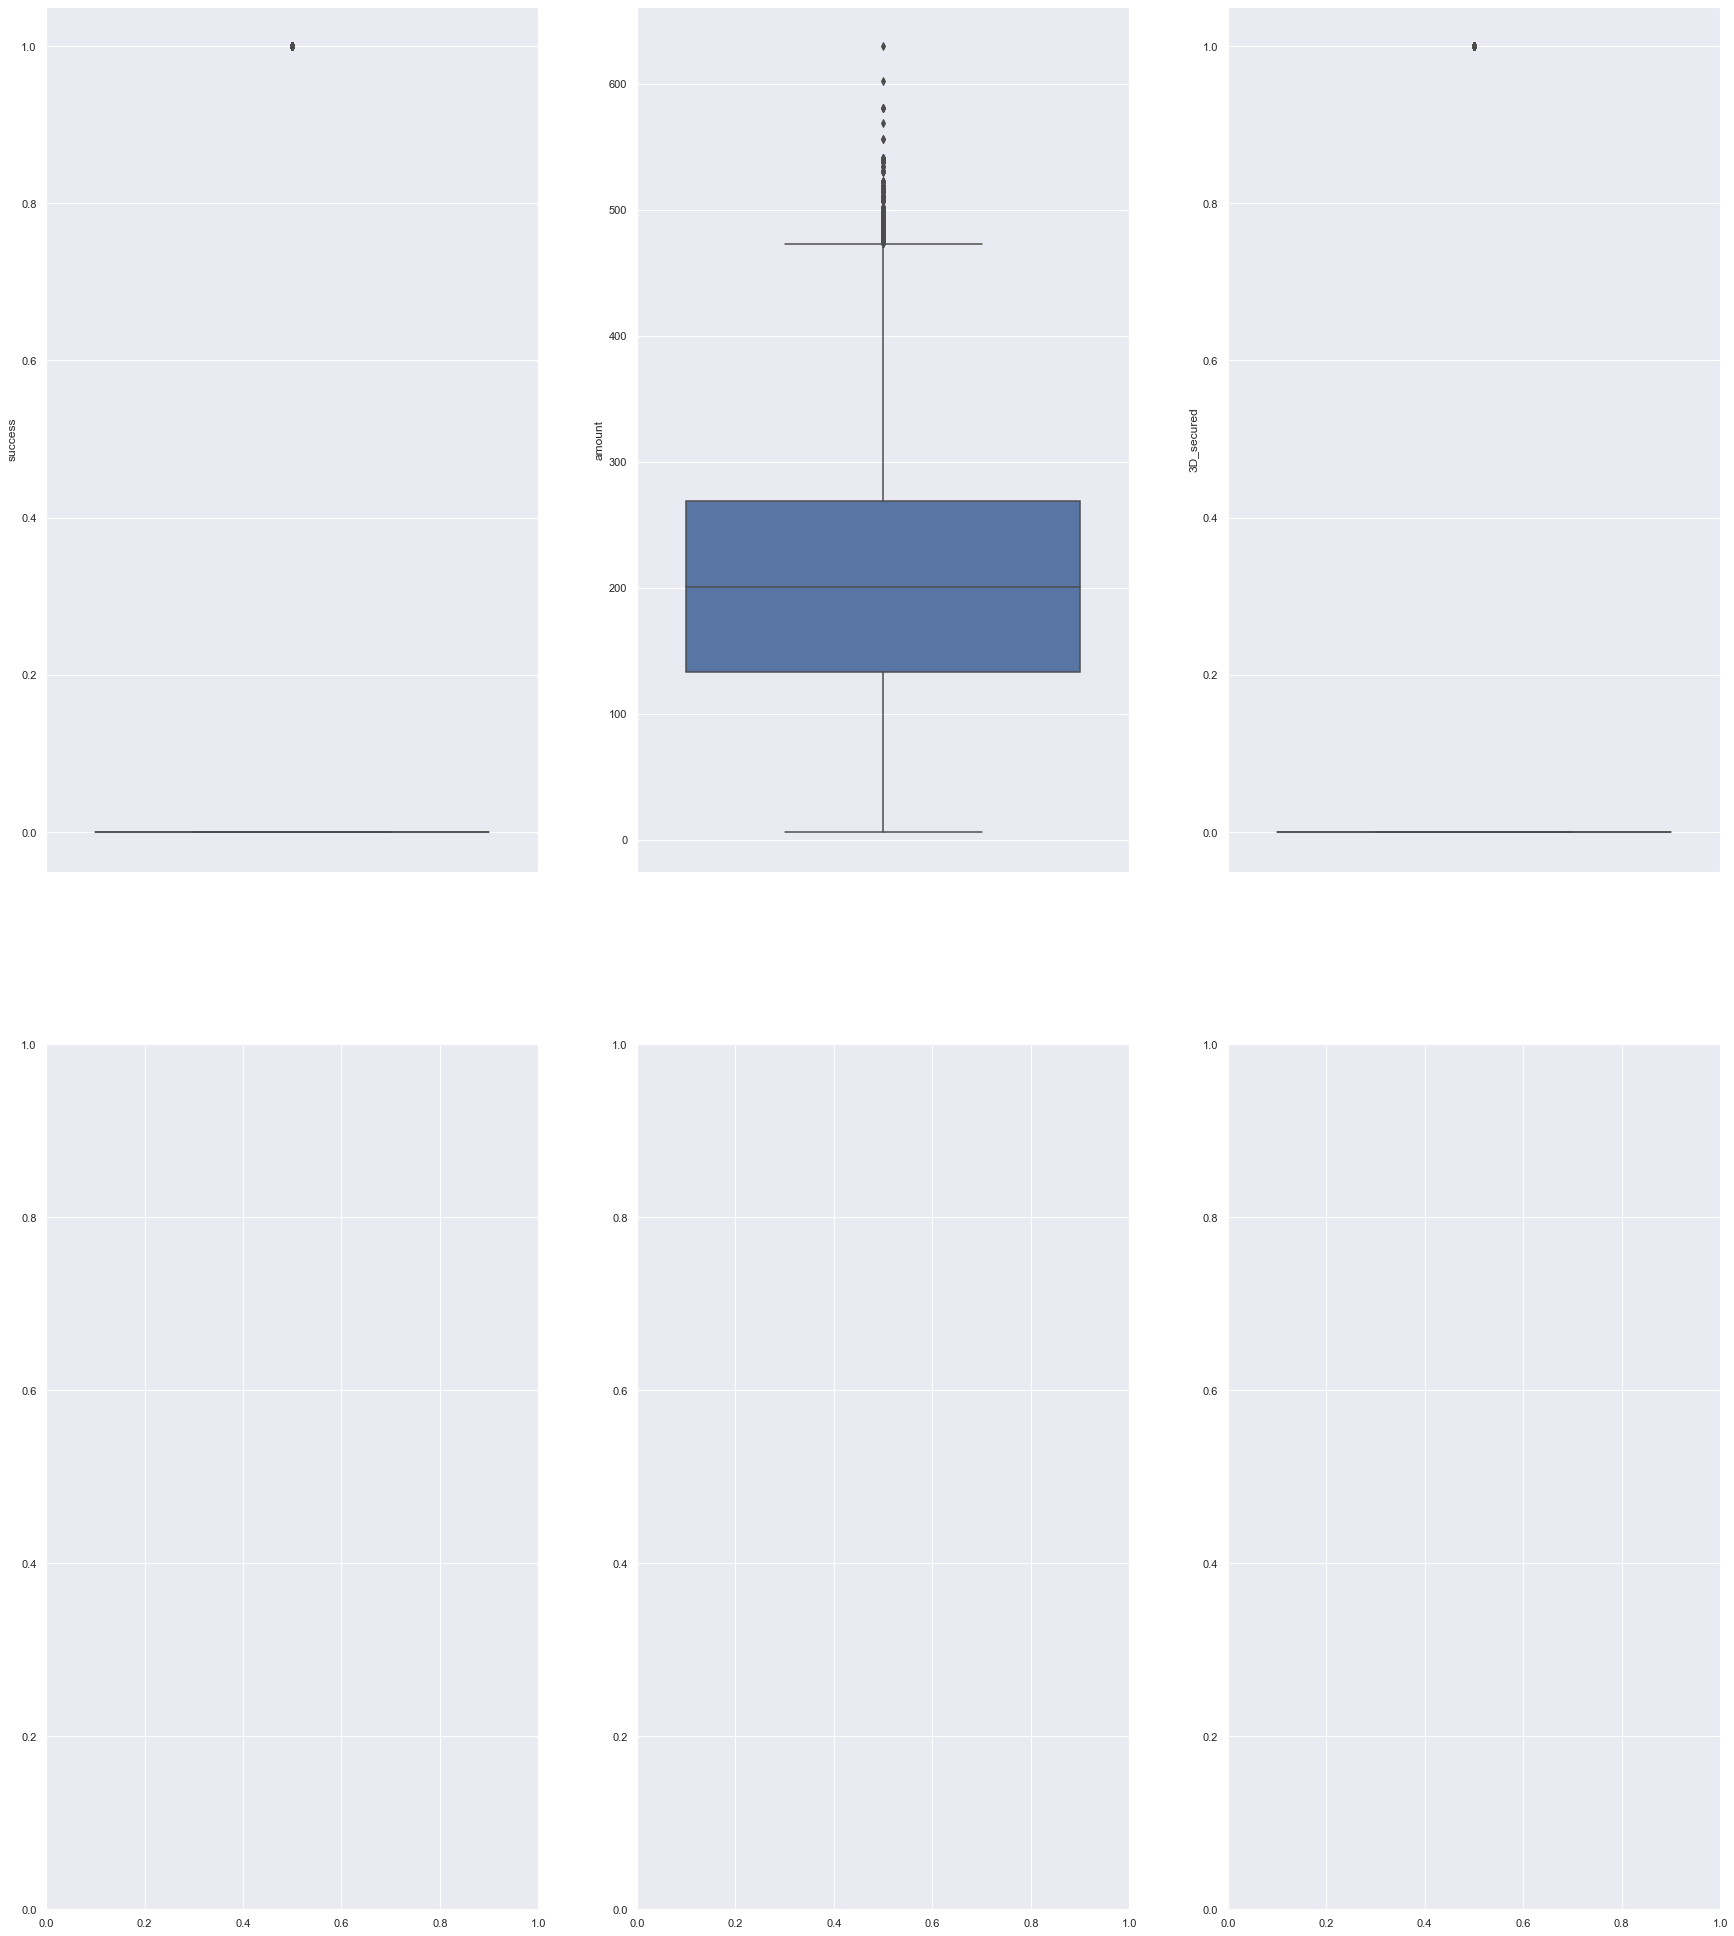

In [9]:
# We call the function to draw the outliers
import seaborn as sns
sns.set()
draw_univariate_plot(dataset=outlier, rows=2, cols=3,plot_type="box")

# Preprocesing + Feature Creation
We do pre-processing and feature creation on the data to prepare for mpdel creation

In [22]:
#Replacing text features with numerical
df2 = pd.get_dummies(df2)
df2.head()

,tmsp,amount,success,3D_secured,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,2019-01-01 00:01:11,89,0,0,0,1,0,0,0,0,1,0,0,1
1,2019-01-01 00:01:17,89,1,0,0,1,0,0,0,0,1,0,0,1
2,2019-01-01 00:02:49,238,0,1,0,1,0,0,0,0,1,1,0,0
3,2019-01-01 00:03:13,238,1,1,0,1,0,0,0,0,1,1,0,0
4,2019-01-01 00:04:33,124,0,0,1,0,0,0,0,1,0,1,0,0


In [33]:
df2.corr()

,amount,success,3D_secured,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
amount,1.000000,-0.086423,0.000178,-0.001509,0.005445,-0.005127,0.002707,-0.002318,-0.006180,0.005734,0.000303,-0.002547,0.002703
success,-0.086423,1.000000,0.059284,0.002079,-0.004648,0.003599,0.131774,0.017502,-0.063746,-0.022366,0.024474,-0.026086,0.007642
3D_secured,0.000178,0.059284,1.000000,0.009128,-0.005085,-0.002790,0.003174,0.001897,0.000274,-0.003197,0.010322,0.001018,-0.010875
country_Austria,-0.001509,0.002079,0.009128,1.000000,-0.602809,-0.250130,-0.008845,0.004670,-0.001765,0.002380,0.002594,0.003990,-0.007113
country_Germany,0.005445,-0.004648,-0.005085,-0.602809,1.000000,-0.621742,0.002492,-0.001754,-0.003135,0.002791,-0.011399,0.002808,0.007398
country_Switzerland,-0.005127,0.003599,-0.002790,-0.250130,-0.621742,1.000000,0.005657,-0.002456,0.005537,-0.005723,0.011286,-0.007324,-0.001995
PSP_Goldcard,0.002707,0.131774,0.003174,-0.008845,0.002492,0.005657,1.000000,-0.115715,-0.149268,-0.274007,0.009948,-0.013586,0.006605
PSP_Moneycard,-0.002318,0.017502,0.001897,0.004670,-0.001754,-0.002456,-0.115715,1.000000,-0.254145,-0.466528,0.008024,-0.000914,-0.006453
PSP_Simplecard,-0.006180,-0.063746,0.000274,-0.001765,-0.003135,0.005537,-0.149268,-0.254145,1.000000,-0.601802,-0.006480,0.007868,-0.003151
PSP_UK_Card,0.005734,-0.022366,-0.003197,0.002380,0.002791,-0.005723,-0.274007,-0.466528,-0.601802,1.000000,-0.005225,0.000526,0.004284


### Choosing Features

In [23]:
cor = df2.corr()
#Correlation with output variable
cor_target = abs(cor["success"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.001]
relevant_features


amount                 0.086423
success                1.000000
3D_secured             0.059284
country_Austria        0.002079
country_Germany        0.004648
country_Switzerland    0.003599
PSP_Goldcard           0.131774
PSP_Moneycard          0.017502
PSP_Simplecard         0.063746
PSP_UK_Card            0.022366
card_Diners            0.024474
card_Master            0.026086
card_Visa              0.007642
Name: success, dtype: float64

In [24]:
df2.head(4)

,tmsp,amount,success,3D_secured,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,2019-01-01 00:01:11,89,0,0,0,1,0,0,0,0,1,0,0,1
1,2019-01-01 00:01:17,89,1,0,0,1,0,0,0,0,1,0,0,1
2,2019-01-01 00:02:49,238,0,1,0,1,0,0,0,0,1,1,0,0
3,2019-01-01 00:03:13,238,1,1,0,1,0,0,0,0,1,1,0,0


# Seperating Features

In [25]:
#Seperating Feature for the Model
y = df2['success'].copy()
#Dropped the tmsp and success fields for the Model's X features
df3=df2.drop(['tmsp','success'],axis=1)
X= df3.copy()

## Base Model

We create a Base Model using a Random Forest Classifier

## Random Forest

In [38]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer,classification_report
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier = RandomForestClassifier(max_depth=10, random_state=42) 

# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
print('Accuracy is ',accuracy_score(y_true = y_test, y_pred = predictions))
print(classification_report(y_test, predictions))

Accuracy is  0.8003372346756595
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      8056
           1       0.53      0.05      0.10      2026

    accuracy                           0.80     10082
   macro avg       0.67      0.52      0.49     10082
weighted avg       0.75      0.80      0.73     10082



## Analyzing Classification Perfomance
We can see that accuracy score is not accurately reflecting our classificaiton performance. Confusion matrix and classification reports show poor precision, recall, and F1 Score for class 1 as compared to clss 0.

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def classification_performance(y_true,y_pred):
    
    print("Confusion Matrix\n")
    print(confusion_matrix(y_true, y_pred))
    # Recall
    print("\nRecall Score\n")
    print(recall_score(y_true, y_pred, average=None))
    # Precision
    print("\nPrecision Score\n")
    print(precision_score(y_true, y_pred, average=None))
    # Method 1: sklearn
    print("\n F1 Score\n")
    print(f1_score(y_true, y_pred, average=None))

In [40]:
print("Classification Performance \n")
classification_performance(y_test,predictions)

Classification Performance 

Confusion Matrix

[[7963   93]
 [1920  106]]

Recall Score

[0.98845581 0.05231984]

Precision Score

[0.80572701 0.53266332]

 F1 Score

[0.88778639 0.0952809 ]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      8056
           1       0.53      0.05      0.10      2026

    accuracy                           0.80     10082
   macro avg       0.67      0.52      0.49     10082
weighted avg       0.75      0.80      0.73     10082



# Final Model

We Fine-tune our Model to Improve the Metric Scores

## Improving the Model with Stratification

In [52]:
# create training and testing vars
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,stratify=y, test_size=0.2)

In [53]:
classifier = RandomForestClassifier(max_depth=10, random_state=42) 
# training the classifier
classifier.fit(X_train1, y_train1)
# do our predictions on the test
predictions = classifier.predict(X_test1)
# see how good we did on the test
print('Accuracy is ',accuracy_score(y_true = y_test1, y_pred = predictions))
print(classification_report(y_test1, predictions))
print(classification_performance(y_test1,predictions))

Accuracy is  0.7992461813132316
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      8036
           1       0.56      0.05      0.09      2046

    accuracy                           0.80     10082
   macro avg       0.68      0.52      0.49     10082
weighted avg       0.75      0.80      0.73     10082

Confusion Matrix

[[7958   78]
 [1946  100]]

Recall Score

[0.99029368 0.04887586]

Precision Score

[0.80351373 0.56179775]

 F1 Score

[0.88717949 0.08992806]
None


Here, we can see some improvement in precision, recall and f1-score for class 1; however results are still disappointing despite use of stratification. We need to look for other strategies to resolve this issue.


## Using SMOTE to Improve the Model

In [46]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_sm)
print(counter)
#print(type)

Counter({0: 40182, 1: 40182})


In [47]:
# create training and testing vars
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,stratify=y_sm, test_size=0.2)

In [50]:
classifier = RandomForestClassifier(max_depth=10, random_state=42) 
# training the classifier
classifier.fit(X_train_sm, y_train_sm)
# do our predictions on the test
predictions = classifier.predict(X_test_sm)
# see how good we did on the test
print('Accuracy is ',accuracy_score(y_true = y_test_sm, y_pred = predictions))
print(classification_report(y_test_sm, predictions))
print(classification_performance(y_test_sm,predictions))

Accuracy is  0.7187208361849063
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      8037
           1       0.72      0.72      0.72      8036

    accuracy                           0.72     16073
   macro avg       0.72      0.72      0.72     16073
weighted avg       0.72      0.72      0.72     16073

Confusion Matrix

[[5768 2269]
 [2252 5784]]

Recall Score

[0.71768073 0.71976108]

Precision Score

[0.719202   0.71824165]

 F1 Score

[0.71844056 0.71900056]
None
